# Введение в проектирование экспериментов

Пример с пациентами, которые не посещают поликлинику по предварительной записи

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data\KaggleV2-May-2016.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [2]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Строим гистограмму Соотношение пропускающих и не пропускающих прием

Text(0.5, 1.0, 'Соотношение пропускающих и не пропускающих прием по направлению')

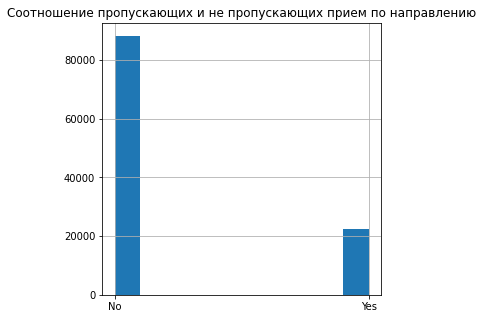

In [3]:
plt.figure (figsize=(5, 5))
df['No-show'].hist()
plt.title('Соотношение пропускающих и не пропускающих прием по направлению')

Вычисление точной пропорции

In [4]:
df['No-show'].value_counts(True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

Кто больше пропускает прием, Мужчины или Женщины?

In [5]:
df[df['No-show'] == 'Yes']['Gender'].value_counts(True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

Столбцы Gender и Neighbourhood кодируем One-Hot методом get_dummies()

In [6]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns=categorical_columns_names)

In [7]:
encoded_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 95 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   PatientId                                  110527 non-null  float64
 1   AppointmentID                              110527 non-null  int64  
 2   ScheduledDay                               110527 non-null  object 
 3   AppointmentDay                             110527 non-null  object 
 4   Age                                        110527 non-null  int64  
 5   Scholarship                                110527 non-null  int64  
 6   Hipertension                               110527 non-null  int64  
 7   Diabetes                                   110527 non-null  int64  
 8   Alcoholism                                 110527 non-null  int64  
 9   Handcap                                    110527 non-null  int64  
 10  SMS_rece